In [1]:
import warnings
warnings.filterwarnings('ignore')

# Packages

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, precision_score, precision_recall_curve, f1_score, fbeta_score

# Importing data

In [29]:
haberman = pd.read_csv("https://raw.githubusercontent.com/bethusaisampath/Haberman-Cancer-Survival-Dataset/master/haberman.csv",
                    header=None)
haberman.columns = ["age", "opYear", "axilNodes", "survStatus"]

In [30]:
haberman.head()

,age,opYear,axilNodes,survStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Simulation

In [5]:
X, y = make_classification(n_samples=1000, n_classes=2,
                           random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
f1_score(y_test, y_pred)

0.8585858585858586

In [6]:
_, _, threshold = precision_recall_curve(y_test, y_pred_prob)

In [7]:
f1score = list()
f05score = list()
f2score = list()
precision = list()
recall = list()

for th in threshold:                                                    
    y_test_pred = list()
    for prob in y_pred_prob:
        if prob > th:
            y_test_pred.append(1)
        else:
            y_test_pred.append(0)
    
    f1score.append(f1_score(y_test, y_test_pred))
    precision.append(precision_score(y_test, y_test_pred))
    recall.append(recall_score(y_test, y_test_pred))
    f05score.append(fbeta_score(y_test, y_test_pred, beta=0.5))
    f2score.append(fbeta_score(y_test, y_test_pred, beta=2))


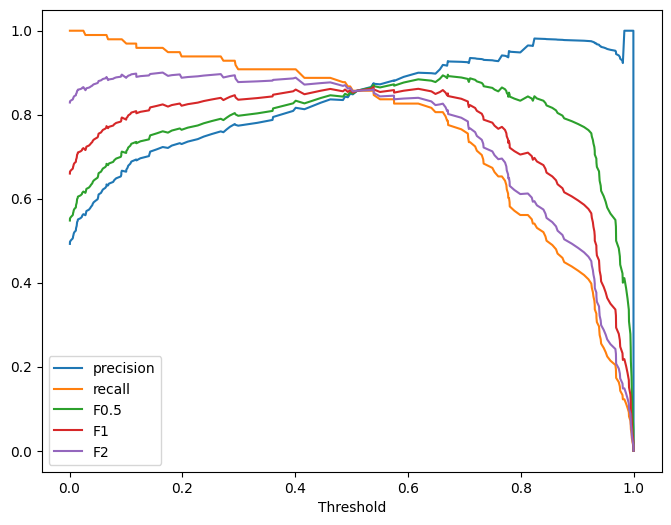

In [9]:
_, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Threshold')
plt.plot(threshold, precision, label='precision')
plt.plot(threshold, recall, label='recall')
plt.plot(threshold, f05score, label='F0.5')
plt.plot(threshold, f1score, label='F1')
plt.plot(threshold, f2score, label='F2')
plt.legend(loc='lower left')

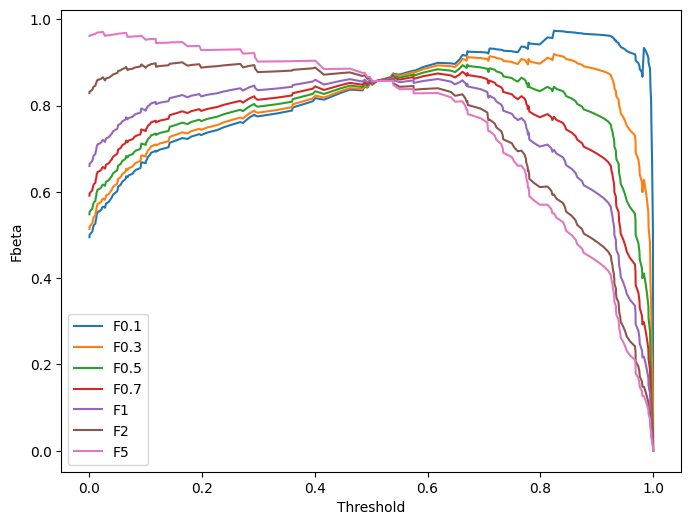

In [28]:
betas = [0.1, 0.3, 0.5, 0.7, 1, 2, 5]
colors = plt.cm.jet(np.array(betas))


_, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Threshold')
ax.set_ylabel('Fbeta')
i=0;
for beta in betas:
    fbetascore = list()
    for i, th in enumerate(threshold):
        y_test_pred = list()
        for prob in y_pred_prob:
            if prob > th:
                y_test_pred.append(1)
            else:
                y_test_pred.append(0)
        fbetascore.append(fbeta_score(y_test, y_test_pred,
                                      beta=beta))
    plt.plot(threshold, fbetascore, label=f'F{beta}')
    i+=1
plt.legend(loc='lower left')

In [22]:
colors = plt.cm.jet(np.linspace(0,1,5))
colors

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.50392157, 1.        , 1.        ],
       [0.49019608, 1.        , 0.47754586, 1.        ],
       [1.        , 0.58169935, 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

# Haberman

In [31]:
haberman.columns

Index(['age', 'opYear', 'axilNodes', 'survStatus'], dtype='object')

In [32]:
X = haberman.drop('survStatus', axis=1)
y = haberman.survStatus

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=24)

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for f-beta, precision, and recall scores at different prob. thresholds
f1_scores = []
f0_5_scores = []
f2_scores = []
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find scores for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(2)
        else:
            y_test_preds.append(1)
            
    f1 = f1_score(y_test, y_test_preds)
    f0_5 = fbeta_score(y_test, y_test_preds, beta=0.5)
    f2 = fbeta_score(y_test, y_test_preds, beta=2)
    prec = precision_score(y_test, y_test_preds)
    rec = recall_score(y_test, y_test_preds)
        
    f1_scores.append(f1)
    f0_5_scores.append(f0_5)
    f2_scores.append(f2)
    precision_scores.append(prec)
    recall_scores.append(rec)

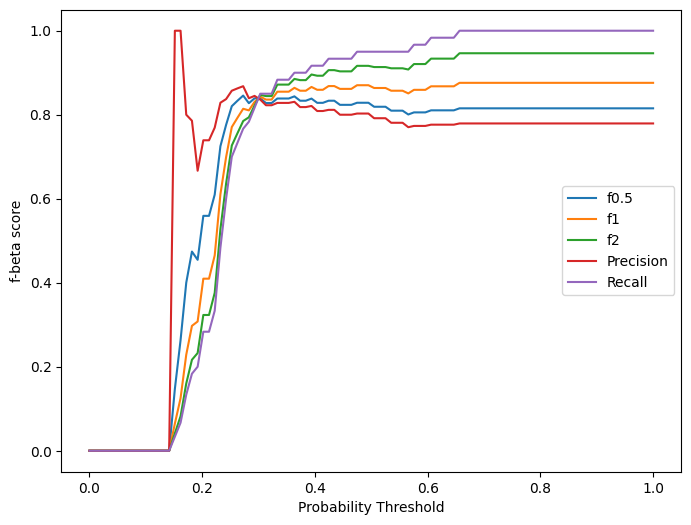

In [34]:

# Plot f_beta, precision, recall curves

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(probability_thresholds, f0_5_scores , label='f0.5')
ax.plot(probability_thresholds, f1_scores, label='f1')
ax.plot(probability_thresholds, f2_scores, label='f2')
ax.plot(probability_thresholds, precision_scores, label='Precision')
ax.plot(probability_thresholds, recall_scores, label='Recall')
ax.set_xlabel('Probability Threshold')
ax.set_ylabel('f-beta score')
ax.legend(loc='center right');

When we care more about minimizing **false positives** than minimizing **false negatives**, we would want to select a $\beta$ value of < 1 for the $F_\beta$ score. In other words, precision would be given more weight than recall in this scenario.

# Resources

- [simulation](https://towardsai.net/p/l/f1-to-f-beta)
- [haberman](https://medium.com/@douglaspsteen/beyond-the-f-1-score-a-look-at-the-f-beta-score-3743ac2ef6e3)